### 학습목표 
- 시각화 패키지 matplotlib
- 서브 패키지 pyplot
- 고급 시각화 패키지 seaborn
- 분석된 내용 시각화할 수 있는 능력필요
- 지도 시각화 패키지  folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### plot 유형
- line
- area
- surface
- bar
- hist
- boxplot

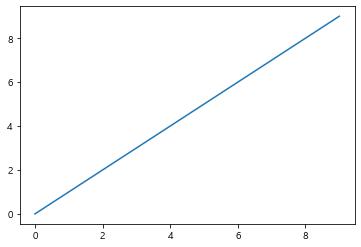

In [9]:
# index : x축, data : y축
data = [0,1,2,3,4,5,6,7,8,9]

# line graph 생성
plt.figure()
plt.plot(data)
plt.show()
plt.close()

# 보편적으로 범주형 데이터가 x축에 사용

- line plot

### file read option
- 1. path
- 2. sep
- 3. header
- 4. skiprows : 제외할 행의 개수
- 5. encoding
- 6. fillna

##### shift + tab 도움말 확인 단축키
- pd는 fillna 지원x

In [58]:
cityDF = pd.read_excel('./data/시도별 전출입 인구수.xlsx',header=0)
cityDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [59]:
cityDF = cityDF.fillna(method='ffill')

In [60]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋 생성
mask = (cityDF['전출지별']=='서울특별시') & (cityDF['전입지별']!= '서울특별시')
seoulDF = cityDF[mask]
display(seoulDF)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [61]:
seoulDF.drop(['전출지별'], axis=1,inplace=True)
display(seoulDF)

C:\Users\jeong\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [62]:
# 원하는 열 인덱스를 다른 이름으로 변경
seoulDF.rename({'전입지별' : '전입지'},axis=1,inplace=True)
display(seoulDF)

C:\Users\jeong\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [63]:
# set_index : 인덱스 변경
seoulDF.set_index('전입지', inplace=True)
display(seoulDF)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [70]:
# 서울 -> 경기도로 이동한 인구 데이터 값만 추출하여 시각화
# display(seoulDF.loc['경기도'])
# print(type(seoulDF.loc['경기도']))
datas = seoulDF.loc['경기도']
print(datas.index)
print(datas.values)

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
[130149 150313 93333 143234 149045 253705 202276 207722 237684 278411
 297539 252073 320174 400875 352238 390265 412535 405220 415174 412933
 473889 384714 428344 502584 542204 599411 520566 495454 407050 471841
 435573 499575 516765 457656 400206 414621 449632 431637 412408 398282
 410735 373771 354135 340801 332785 359337 370760 342433]


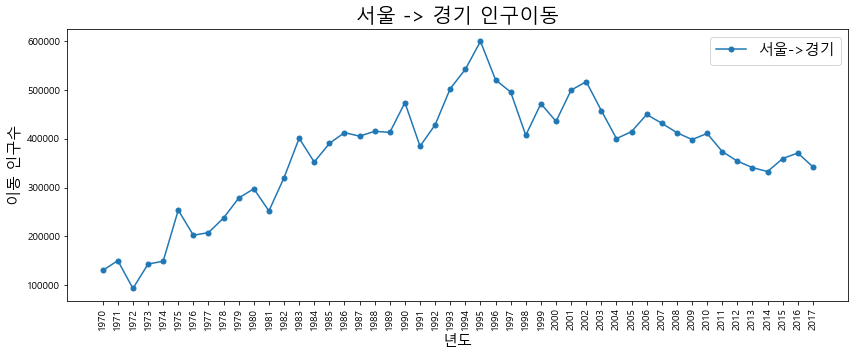

In [93]:
plt.figure(figsize=(14,5))

plt.plot(datas.index, datas.values,marker='o', markersize=5)
# plt.plot(datas)


plt.title('서울 -> 경기 인구이동',size=20)
plt.xlabel('년도',size=15)
plt.ylabel('이동 인구수',size=15)
plt.xticks(size=10,rotation='vertical') # 년도겹칩 문제해결
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)

plt.show()
plt.close()

<ipython-input-117-f746452a4622>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax02.set_xticklabels(datas.index,rotation=75)


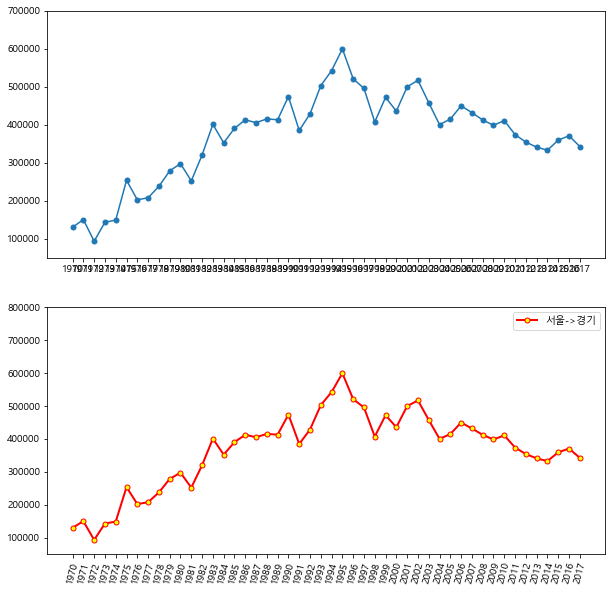

In [117]:
# 한 화면에 여러 개의 그래프 그리기
fig = plt.figure(figsize=(10,10))
ax01 = fig.add_subplot(2,1,1) # 2행1열의 첫번째
ax02 = fig.add_subplot(2,1,2) # 2행1열의 두번째

# marker = o, +, *, .
ax01.plot(datas,marker='o',markersize=5)
ax02.plot(datas, marker='o', markersize=5, color='red', linewidth=2, 
          label='서울->경기',
         markerfacecolor='yellow')
ax02.legend() # label 생성 시 필수

# y축 범위설정
ax01.set_ylim(50000,700000) 
ax02.set_ylim(50000,800000) 

# set_xticklabels
ax02.set_xticklabels(datas.index,rotation=75)

plt.show()
plt.close()

In [259]:
# 서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터만 추출하여 데이터프레임 생성
# display(seoulDF)

# datas02 = seoulDF.loc[['충청남도','경상북도','강원도']].T
# display(datas02)
# print(type(datas02))

col_years = list(map(str,range(1970,2018)))
# display(col_years) # list 형태로 년도 받음

dataDF = seoulDF.loc[['충청남도','경상북도','강원도'],col_years]
display(dataDF)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [260]:
# a = [1.2, 2.5, 3.7]
# for i in range(len(a)) :
#     a[i] = int(a[i])
# a    

# map() : for문 대신 간단하게 작업
a = [1.2, 2.5, 3.7]
a = list(map(int,a))
a

[1, 2, 3]

In [261]:
# plt.figure(figsize=(14,5))
# print(datas02.index)
# print(datas02.values)

# plt.plot(datas02.index, datas02.values,marker='o', markersize=5)

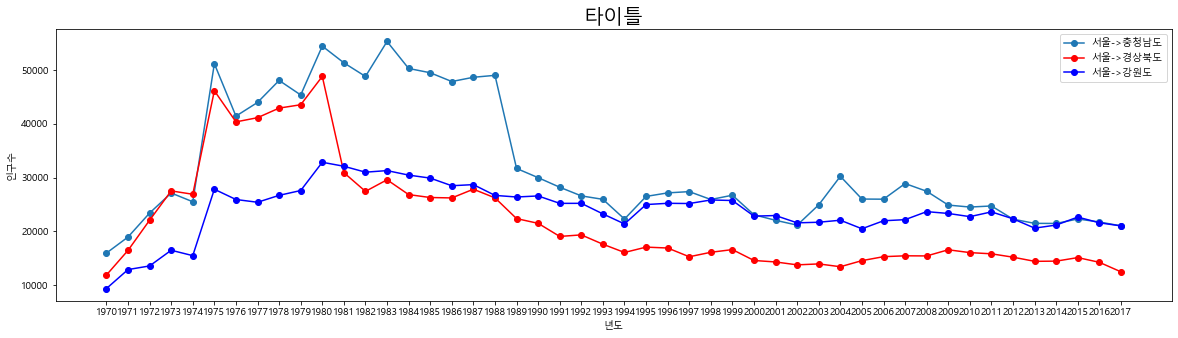

In [262]:
# 한 화면에 여러 개의 그래프 생성
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years,dataDF.loc['충청남도',:], marker='o',label='서울->충청남도')

ax.plot(col_years,dataDF.loc['경상북도',:], marker='o',color='red',label='서울->경상북도')

ax.plot(col_years,dataDF.loc['강원도',:], marker='o',color='blue',label='서울->강원도')

# subplot에 대한 title, label 설정
ax.set_title('타이틀', size=20)

ax.set_xlabel('년도')
ax.set_ylabel('인구수')


ax.legend(loc='best')
plt.show()
plt.close()

In [263]:
# matplotlib 의 color
matplotlib.colors.cnames.items()

dict_items([('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'), ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'), ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), ('darkorchid', '#9932CC'), ('darkred', '#8B0000'), ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), ('

- barplot

In [264]:
Y = [2,3,1]
X = np.arange(len(Y))
print(X)

[0 1 2]


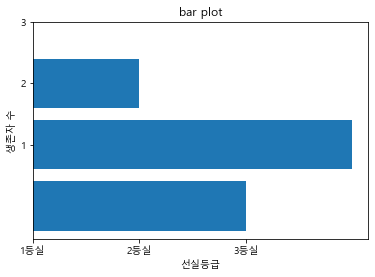

In [265]:
xlabel = ['1등실','2등실','3등실']
plt.figure()
# plt.bar(X,Y)
plt.barh(X,Y) # 수평으로 barplot 생성

plt.title('bar plot')
plt.xlabel('선실등급')
plt.ylabel('생존자 수')
plt.xticks(X,xlabel) # 지정해준 label로 변경
plt.yticks(Y) 

plt.show()
plt.close()

In [266]:
# 서울 -> 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터의 데이터프레임 생성
# 조건) 2010년 ~ 2017년까지의 데이터
col_years = list(map(str,range(2010,2018)))
# print(col_years)
dataDF = seoulDF.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
# display(dataDF)
# print(dataDF.index)
# print(dataDF.values)
# print(type(dataDF.values))
### dF와 numpy 수행속도 차이 알아보기

dataDF = dataDF.T
display(dataDF)
print(dataDF.index)
print(dataDF.values)
dataDF.index = dataDF.index.map(int) # map ㅇㄹ 활용한 데이터 형 변환
print(dataDF.index)
# dataDF.index.astype(str)

### map과 astype의 차이 알아보기

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')
[[24522 16042 22736 16429]
 [24723 15818 23624 15974]
 [22269 15191 22332 14765]
 [21486 14420 20601 14187]
 [21473 14456 21173 14591]
 [22299 15113 22659 14598]
 [21741 14236 21590 13065]
 [21020 12464 21016 12426]]
Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')


<Figure size 432x288 with 0 Axes>

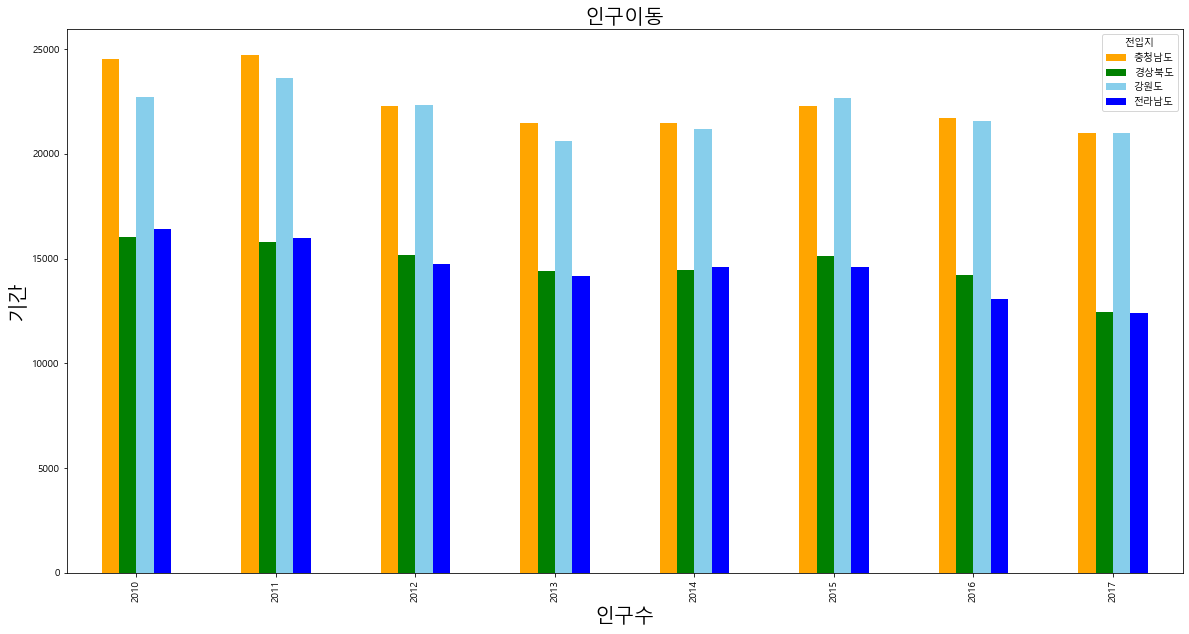

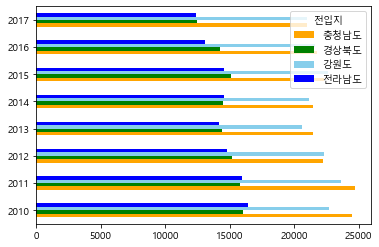

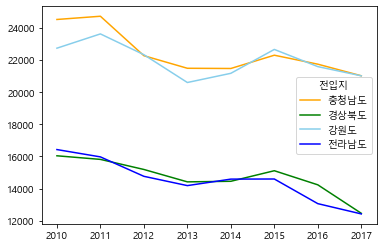

In [267]:
# 데이터프레임에 plot 사용가능 (plt가 아닌)
plt.figure()

# 멀티바 생성
dataDF.plot(kind='bar',
            figsize = (20,10),
           color = ['orange','green','skyblue','blue'])
plt.title('인구이동',size=20)
plt.xlabel('인구수',size=20)
plt.ylabel('기간',size=20)


dataDF.plot(kind='barh',
           color = ['orange','green','skyblue','blue'])

dataDF.plot(kind='line',
           color = ['orange','green','skyblue','blue'])

plt.show()
plt.close()

In [ ]:
dataDF = dataDF.T
# dataDF['합계'] = dataDF.sum(axis=1).sort_values(ascending=True)
dataDF['합계'] = dataDF.sum(axis=1)
# display(dataDF)

In [268]:
# 2010 ~ 2017년 이동 인구 수를 합하여 새로운 열(합계) 추가하여
# 가장 큰 값으로 정렬하고 
# 수평 막대 그래프로 시각화

sumDF = dataDF[['합계']].sort_values(by='합계',ascending=True)
display(sumDF)

,합계
전입지,
전라남도,116035.0
경상북도,117740.0
강원도,175731.0
충청남도,179533.0


Text(0.5, 1.0, '인구이동')

<Figure size 432x288 with 0 Axes>

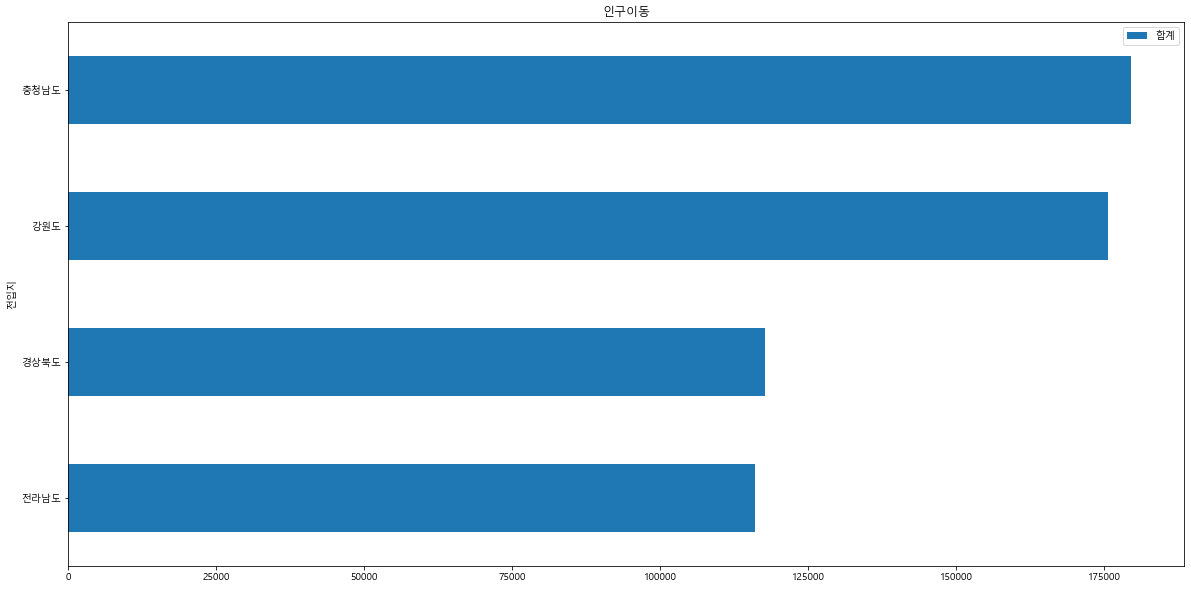

In [269]:
plt.figure()

sumDF.plot(kind='barh',
           figsize = (20,10))

plt.title('인구이동')

In [271]:
import seaborn as sns

In [273]:
iris_datasets = sns.load_dataset('iris')
iris_datasets

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [274]:
print(iris_datasets.index)
print(iris_datasets.columns)

RangeIndex(start=0, stop=150, step=1)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [275]:
iris_datasets['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [278]:
iris_datasets.rename(columns = {iris_datasets.columns[0] : 'SL',
                     iris_datasets.columns[1] : 'SW',
                     iris_datasets.columns[2] : 'PL',
                     iris_datasets.columns[3] : 'PW',
                     iris_datasets.columns[4] : 'Y'},inplace=True)
iris_datasets

,SL,SW,PL,PW,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [281]:
iris_datasets[['SL','SW']][:5]

,SL,SW
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [286]:
# 종을 기준으로 그룹화하여 각 그룹의 평균 계산
iris_mean_df = iris_datasets.groupby('Y').mean()
display(iris_mean_df)

,SL,SW,PL,PW
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [287]:
print(iris_mean_df.index)

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Y')


In [288]:
iris_mean_df.T

Y,setosa,versicolor,virginica
SL,5.006,5.936,6.588
SW,3.428,2.770,2.974
PL,1.462,4.260,5.552
PW,0.246,1.326,2.026


<Figure size 432x288 with 0 Axes>

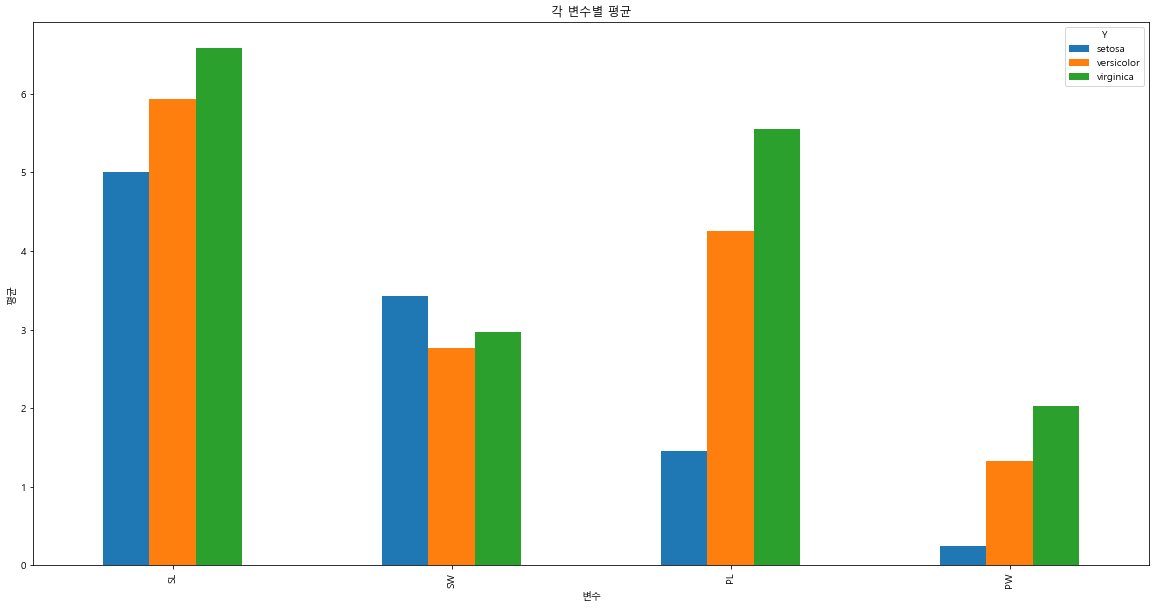

In [294]:
plt.figure()

iris_mean_df.T.plot(kind='bar',
                   figsize = (20,10))

plt.title('각 변수별 평균')
plt.xlabel('변수')
plt.ylabel('평균')

plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

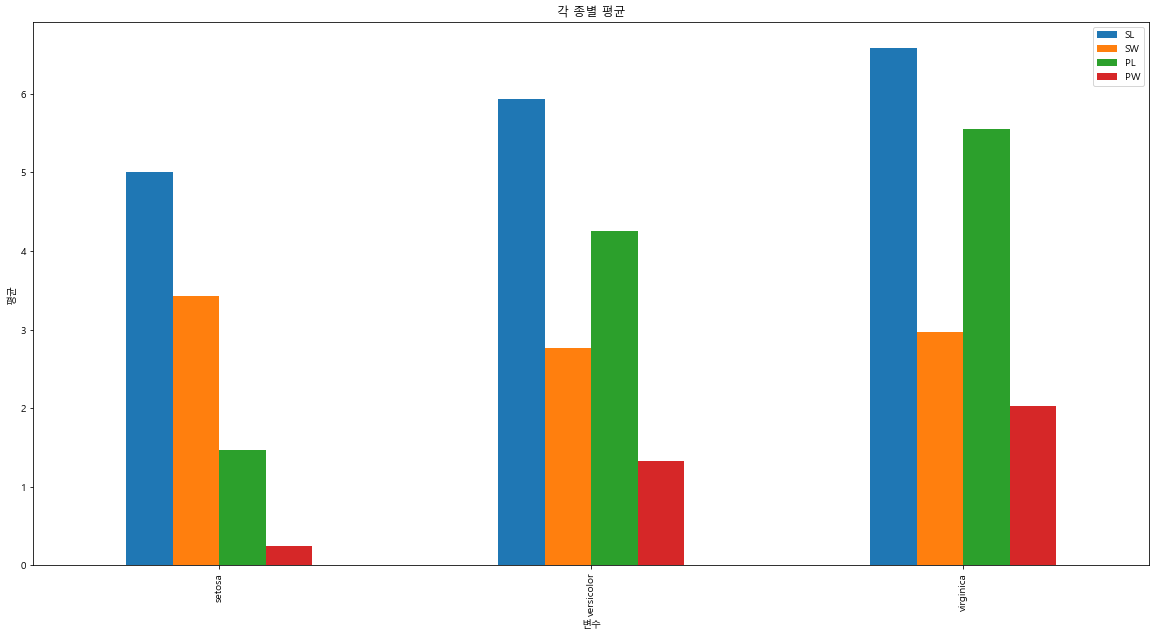

In [296]:
plt.figure()

iris_mean_df.plot(kind='bar',
                   figsize = (20,10))

plt.title('각 종별 평균')
plt.xlabel('변수')
plt.ylabel('평균')

plt.show()
plt.close()

- box plot : 이상치 확인

In [299]:
boxDF = iris_datasets[['SL','Y']]
display(boxDF)

,SL,Y
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


<Figure size 432x288 with 0 Axes>

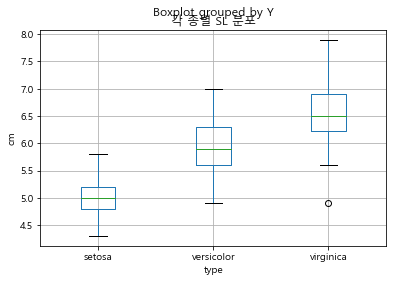

In [301]:
# 종별 SL 에 대한 분포확인
plt.figure()

boxDF.boxplot(by='Y')

plt.title('각 종별 SL 분포')
plt.xlabel('type')
plt.ylabel('cm')

plt.show()
plt.close()